<a href="https://colab.research.google.com/github/puttipongyy/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#mount colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
shopping_data = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/customer_shopping_data.csv')

In [60]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [40]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [13]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   invoice_no      99457 non-null  object
 1   customer_id     99457 non-null  object
 2   gender          99457 non-null  object
 3   age             99457 non-null  int64 
 4   category        99457 non-null  object
 5   quantity        99457 non-null  int64 
 6   price           99457 non-null  object
 7   payment_method  99457 non-null  object
 8   invoice_date    99457 non-null  object
 9   shopping_mall   99457 non-null  object
dtypes: int64(2), object(8)
memory usage: 7.6+ MB


#เราจะลบ price ของ records ที่เป็น clothing , cash , metrocity เพื่อจำลอง missingdata


In [41]:
shopping_data[(shopping_data['category'] == 'Clothing') &
 (shopping_data['payment_method'] == 'Cash') &
 (shopping_data['shopping_mall'] == 'Metrocity')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [29]:
import numpy as np

In [47]:
willbe_missing = shopping_data[(shopping_data['category'] == 'Clothing') &
 (shopping_data['payment_method'] == 'Cash') &
 (shopping_data['shopping_mall'] == 'Metrocity')]

In [48]:
willbe_missing.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity


In [36]:
willbe_missing['price'] = np.nan

<ipython-input-36-c75868475864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  willbe_missing['price'] = np.nan


In [50]:
willbe_missing.loc[(shopping_data['category'] == 'Clothing') & (shopping_data['payment_method'] == 'Cash') & (shopping_data['shopping_mall'] == 'Metrocity') , 'price'] = np.nan

In [51]:
willbe_missing.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity


In [38]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   invoice_no      99457 non-null  object
 1   customer_id     99457 non-null  object
 2   gender          99457 non-null  object
 3   age             99457 non-null  int64 
 4   category        99457 non-null  object
 5   quantity        99457 non-null  int64 
 6   price           97173 non-null  object
 7   payment_method  99457 non-null  object
 8   invoice_date    99457 non-null  object
 9   shopping_mall   99457 non-null  object
dtypes: int64(2), object(8)
memory usage: 7.6+ MB


tarm ajarn

In [65]:
nomissing = shopping_data[(shopping_data['category']!='Clothing')|
 (shopping_data['payment_method']!='Cash')|
 (shopping_data['shopping_mall']!='Metrocity')]

In [66]:
new_shopping_data = pd.concat([willbe_missing,nomissing])
new_shopping_data.shape

(99457, 10)

using Loc

In [61]:
new_shopping_data_bard = shopping_data.copy()
new_shopping_data_bard.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [62]:
new_shopping_data_bard.loc[(new_shopping_data_bard['category'] == 'Clothing') &
 (new_shopping_data_bard['payment_method'] == 'Cash') &
  (new_shopping_data_bard['shopping_mall'] == 'Metrocity') , 'price'] = np.nan

In [63]:
new_shopping_data_bard.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [64]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [84]:
set(shopping_data['shopping_mall'])

{'Cevahir AVM',
 'Emaar Square Mall',
 'Forum Istanbul',
 'Istinye Park',
 'Kanyon',
 'Mall of Istanbul',
 'Metrocity',
 'Metropol AVM',
 'Viaport Outlet',
 'Zorlu Center'}

## Example

In [68]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

## Fix

### 1. ignore

quiz
- data หายไปกี่ %
- mean data รวมหลังจากแก้ missing เป็นเท่าใด

In [69]:
new_shopping_data_drop = new_shopping_data.dropna()
new_shopping_data_drop.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [70]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

2.2964698311833254

In [103]:
new_shopping_data_drop.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 2. เติมด้วย unknow *เราจะเติมกับ ข้อมูล Categorical

### 3. เติมด้วย ค่าเฉลี่ย

quiz
- ค่าเฉลี่ยใหม่เป็นเท่าใด

In [71]:
mean_val = new_shopping_data_drop['price'].mean()
mean_val

684.4238731952291

In [73]:
new_missing_data_fillmean = new_shopping_data.fillna({'price':mean_val})
new_missing_data_fillmean.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 4 . เติมด้วยค่าเฉลี่ยของกลุ่ม

quiz
- mean หลังเติมด้วยค่าเฉลี่ย Clothing
- mean หลังเติมด้วยค่าเฉลี่ย Cash
- mean หลังเติมด้วยค่าเฉลี่ย Metrocity
- mean หลังเติมด้วยค่าเฉลี่ย Cash + Megacity

In [74]:
mean_clothing = new_shopping_data_drop[new_shopping_data_drop['category'] == 'Clothing']['price'].mean()
mean_clothing

901.5259373350308

In [75]:
new_missing_data_fillmean_clothing = new_shopping_data.fillna({'price':mean_clothing})
new_missing_data_fillmean_clothing.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.409557
std,14.990054,1.413025,939.036135
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [76]:
mean_cash = new_shopping_data_drop[new_shopping_data_drop['payment_method'] == 'Cash']['price'].mean()
mean_cash

679.7710338448402

In [78]:
new_missing_data_fillmean_cash = new_shopping_data.fillna({'price':mean_cash})
new_missing_data_fillmean_cash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.317022
std,14.990054,1.413025,938.473117
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [108]:
mean_metro = new_shopping_data_drop[new_shopping_data_drop['shopping_mall'] == 'Metrocity']['price'].mean()
mean_metro

644.7815816767501

In [109]:
new_missing_data_fillmean_metro = new_shopping_data.fillna({'price':mean_metro})
new_missing_data_fillmean_metro.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,683.513500
std,14.990054,1.413025,938.491645
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [110]:
mean_metroCash = new_shopping_data_drop[(new_shopping_data_drop['shopping_mall'] == 'Metrocity') & (new_shopping_data_drop['payment_method'] == 'Cash') ]['price'].mean()
mean_metroCash

577.9630292559318

In [111]:
new_missing_data_fillmean_metroCash = new_shopping_data.fillna({'price':mean_metroCash})
new_missing_data_fillmean_metroCash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,681.979032
std,14.990054,1.413025,938.608338
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

In [85]:
willbe_dup = shopping_data[(shopping_data['category'] == 'Clothing') &
 (shopping_data['payment_method'] == 'Cash') &
 (shopping_data['shopping_mall'] == 'Metrocity')]

In [86]:
new_shopping_dup = pd.concat([shopping_data,willbe_dup])
new_shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [87]:
new_shopping_dup.sort_values("invoice_date")

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [88]:
new_shopping_dup.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
98987     True
99153     True
99178     True
99339     True
99390     True
Length: 101741, dtype: bool

In [89]:
new_shopping_dup.duplicated().any()

True

In [90]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


## Example

## Fix

### 1. drop Duplicate

In [91]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [92]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [94]:
from matplotlib import pyplot as plt

## Example

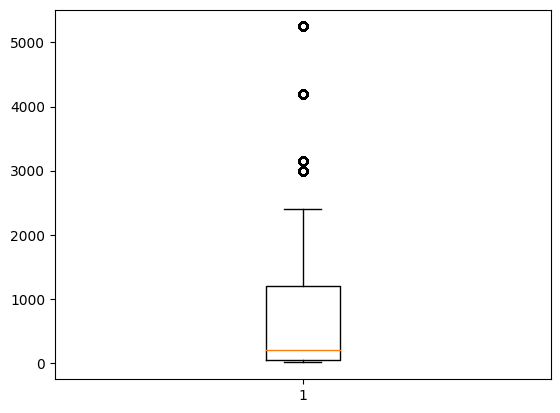

In [95]:
ret = plt.boxplot(shopping_data['price']);

In [97]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7964cc189450>,
 'caps': [<matplotlib.lines.Line2D at 0x7964cc18be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7964cc18ae60>],
 'medians': [<matplotlib.lines.Line2D at 0x7964cc189330>],
 'fliers': [<matplotlib.lines.Line2D at 0x7964cc18a980>],
 'means': []}

In [99]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [100]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [101]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [102]:
shopping_data[ shopping_data['price']<= ret['whiskers'][1].get_ydata()[1] ]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


In [96]:
ret['fliers'][0].get_ydata().shape

(5024,)

## Fix

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

## Example

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

## Fix